In [41]:
# http://www.statsmodels.org/stable/examples/notebooks/generated/ols.html
%matplotlib inline

from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)

In [6]:
# OLS estimation
# create artificial data
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [3]:
# add a column as intercept
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [4]:
# fit and summary
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Sun, 22 Jul 2018   Prob (F-statistic):          2.83e-239
Time:                        18:47:37   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

In [5]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 1.34233516 -0.04024948 10.01025357]
R2:  0.9999879365025871


In [7]:
# OLS non-linear curve but linear in parameters
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

In [8]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     232.2
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           8.80e-28
Time:                        18:55:23   Log-Likelihood:                -34.271
No. Observations:                  50   AIC:                             76.54
Df Residuals:                      46   BIC:                             84.19
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5233      0.026     19.886      0.0

In [9]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.52334809  0.37447144 -0.0223435   4.91092107]
Standard errors:  [0.02631805 0.10345934 0.00231074 0.17064722]
Predicted values:  [ 4.35233362  4.80205743  5.21991591  5.5855007   5.8857687   6.11718504
  6.28630383  6.40869134  6.5063685   6.60419295  6.72577498  6.88959841
  7.1059838   7.37539275  7.68835211  8.02701036  8.36807059  8.6866181
  8.96021381  9.17258095  9.31627929  9.39392752  9.41777306  9.40767978
  9.38786447  9.38291808  9.41376548  9.49422757  9.62875055  9.81167543
 10.02816778 10.25665496 10.47237048 10.65142305 10.77472185 10.83111309
 10.81921257 10.74763307 10.63356931 10.49997292 10.37178152 10.27182158
 10.21705804 10.21580708 10.26636975 10.35731113 10.46933904 10.57847369
 10.6599875  10.69246777]


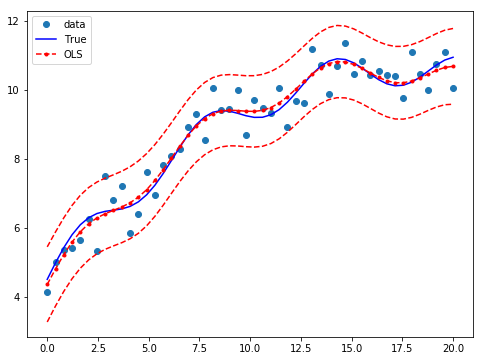

In [11]:
prstd, iv_1, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label='data')
ax.plot(x, y_true, 'b-', label='True')
ax.plot(x, res.fittedvalues, 'r--.', label='OLS')
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_1, 'r--')
ax.legend(loc='best');

In [12]:
# OLS with dummy variables
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
# dummy = (groups[:, None] == np.unique(groups)).astype(float)

dummy = sm.categorical(groups, drop=True)
x = np.linspace(0,20,nsample)
# drop reference category
X = np.column_stack((x, dummy[:, 1:]))
X = sm.add_constant(X, prepend=False)

beta = [1., 3, -3,10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

In [21]:
print(X[:5, :])
print(y[:5])
print(groups)
print(dummy[:5,:])

[[0.         0.         0.         1.        ]
 [0.40816327 0.         0.         1.        ]
 [0.81632653 0.         0.         1.        ]
 [1.2244898  0.         0.         1.        ]
 [1.63265306 0.         0.         1.        ]]
[ 9.36492787 10.5737534   9.33342616  9.73817365  9.75663622]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [22]:
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     586.7
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           1.18e-36
Time:                        19:09:00   Log-Likelihood:                -68.316
No. Observations:                  50   AIC:                             144.6
Df Residuals:                      46   BIC:                             152.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0509      0.064     16.299      0.0

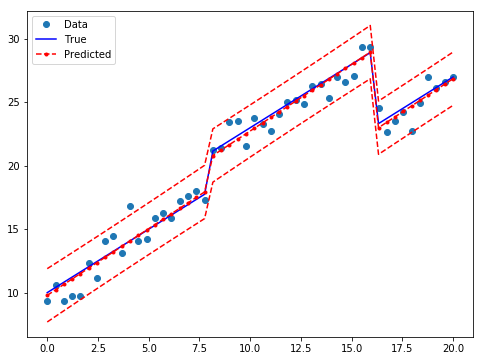

In [23]:
prstd, iv_l, iv_u = wls_prediction_std(res2)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label='Data')
ax.plot(x, y_true, 'b-', label='True')
ax.plot(x, res2.fittedvalues, 'r--.', label='Predicted')
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
legend = ax.legend(loc='best')

In [24]:
# Joint hypothesis test
# F test
# We want to test the hypothesis that both coefficients on the dummy variables are equal to zero, that is,  R×β=0 . An F test leads us to strongly reject the null hypothesis of identical constant in the 3 groups:

In [25]:
R = [[0,1,0,0], [0,0,1,0]]
print(np.array(R))
print(res2.f_test(R))

[[0 1 0 0]
 [0 0 1 0]]
<F test: F=array([[124.98895964]]), p=2.537849916133354e-19, df_denom=46, df_num=2>


In [26]:
print(res2.f_test('x2 = x3 = 0'))

<F test: F=array([[124.98895964]]), p=2.537849916133635e-19, df_denom=46, df_num=2>


In [27]:
# Small group effects
beta = [1., 0.3, -0.0, 10]
y_true = np.dot(X, beta)
y = y_true + np.random.normal(size=nsample)

res3 = sm.OLS(y, X).fit()

In [28]:
print(res3.f_test(R))

<F test: F=array([[0.26285274]]), p=0.7700020528759954, df_denom=46, df_num=2>


In [29]:
print(res3.f_test('x2=x3=0'))

<F test: F=array([[0.26285274]]), p=0.7700020528759954, df_denom=46, df_num=2>


In [30]:
# Multicollinearity
# The Longley dataset is well known to have high multicollinearity. That is, the exogenous predictors are highly correlated. This is problematic because it can affect the stability of our coefficient estimates as we make minor changes to model specification.

In [31]:
from statsmodels.datasets.longley import load_pandas
y = load_pandas().endog
X = load_pandas().exog
X = sm.add_constant(X)

In [32]:
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           4.98e-10
Time:                        19:19:32   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.0

/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [33]:
# Condition number
# One way to assess multicollinearity is to compute the condition number. Values over 20 are worrisome (see Greene 4.9). The first step is to normalize the independent variables to have unit length:

In [34]:
norm_x = X.values
for i, name in enumerate(X):
    if name == 'const':
        continue
    norm_x[:, i] = X[name]/np.linalg.norm(X[name])
norm_xtx = np.dot(norm_x.T, norm_x)

In [35]:
# Then, we take the square root of the ratio of the biggest to the smallest eigen values
eigs = np.linalg.eigvals(norm_xtx)
condition_number = np.sqrt(eigs.max() / eigs.min())
print(condition_number)

56240.87074537246


In [36]:
# Dropping an observation
# Greene also points out that dropping a single observation can have a dramatic effect on the coefficient estimates:

ols_results2 = sm.OLS(y.iloc[:14], X.iloc[:14]).fit()
print("Percentage change %4.2f%%\n"*7 % tuple([i for i in (ols_results2.params - ols_results.params)/ols_results.params*100]))

Percentage change 4.55%
Percentage change -2228.01%
Percentage change 154304695.31%
Percentage change 1366329.02%
Percentage change 1112549.36%
Percentage change 92708715.91%
Percentage change 817944.26%



In [38]:
infl = ols_results.get_influence()

In [39]:
2./len(X)**.5

0.5

In [40]:
print(infl.summary_frame().filter(regex='dfb'))

    dfb_const  dfb_GNPDEFL       dfb_GNP     dfb_UNEMP     dfb_ARMED  \
0   -0.016406  -169.822675  1.673981e+06  54490.318088  51447.824036   
1   -0.020608  -187.251727  1.829990e+06  54495.312977  52659.808664   
2   -0.008382   -65.417834  1.587601e+06  52002.330476  49078.352378   
3    0.018093   288.503914  1.155359e+06  56211.331922  60350.723082   
4    1.871260  -171.109595  4.498197e+06  82532.785818  71034.429294   
5   -0.321373  -104.123822  1.398891e+06  52559.760056  47486.527649   
6    0.315945  -169.413317  2.364827e+06  59754.651394  50371.817827   
7    0.015816   -69.343793  1.641243e+06  51849.056936  48628.749338   
8   -0.004019   -86.903523  1.649443e+06  52023.265116  49114.178265   
9   -1.018242  -201.315802  1.371257e+06  56432.027292  53997.742487   
10   0.030947   -78.359439  1.658753e+06  52254.848135  49341.055289   
11   0.005987  -100.926843  1.662425e+06  51744.606934  48968.560299   
12  -0.135883   -32.093127  1.245487e+06  50203.467593  51148.37

/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:323: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:337: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_internal * np.sqrt(hii / (1 - hii))
/Users/gaoziyao/anaco